# Task 1 
task 1 is performed on california_housing dataset as the boston dataset has been removed from the sklearn library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# In this code block the Boston Housing dataset was loaded using the load_boston function from the sklearn.
datasets module. This dataset contains features related to housing characteristics, which were used to perform ridge regression for house price prediction. The data was split into training and validation sets, standardized, and used to tune hyperparameters to achieve the best model performance."

In [2]:
# Load the Boston housing dataset
data = load_boston()
X = data.data
y = data.target 

# Print dataset information
print("Boston Housing Dataset Information:")
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])
print("Feature names:", data.feature_names)
print("Target values:", y)

Boston Housing Dataset Information:
Number of samples: 506
Number of features: 13
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Target values: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

# Dataset Transformation and Exploration

The dataset's features were mapped to their corresponding names from the `data.feature_names` attribute, facilitating enhanced readability and comprehension. Transforming the dataset into a pandas DataFrame, named *boston_df*, enabled a structured representation of the data. Each feature was assigned a column, and a 'Target' column was appended to incorporate the target variable (*y*) for a holistic view.

The initial rows of the DataFrame were examined using the `head()` function, providing an overview of the dataset's structure and content. This transformation and exploration phase was essential for understanding the data's organization and contents before proceeding with further analysis and modeling tasks.

In [3]:
feature_names = data.feature_names

# Convert the dataset to a pandas DataFrame
boston_df = pd.DataFrame(X, columns=feature_names)
boston_df['MEDV'] = y  # Add target column

# Print the head of the DataFrame
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- **CRIM**: Per capita crime rate by town.
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town.
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- **NOX**: Nitric oxides concentration (parts per 10 million).
- **RM**: Average number of rooms per dwelling.
- **AGE**: Proportion of owner-occupied units built prior to 1940.
- **DIS**: Weighted distances to five Boston employment centres.
- **RAD**: Index of accessibility to radial highways.
- **TAX**: Full-value property-tax rate per $10,000.

- **PTRATIO**: Pupil-teacher ratio by town.

- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- **LSTAT**: Percentage lower status of the population.

- **MEDV**: Median value of owner-occupied homes in $1000's.

# Correlation Heatmap

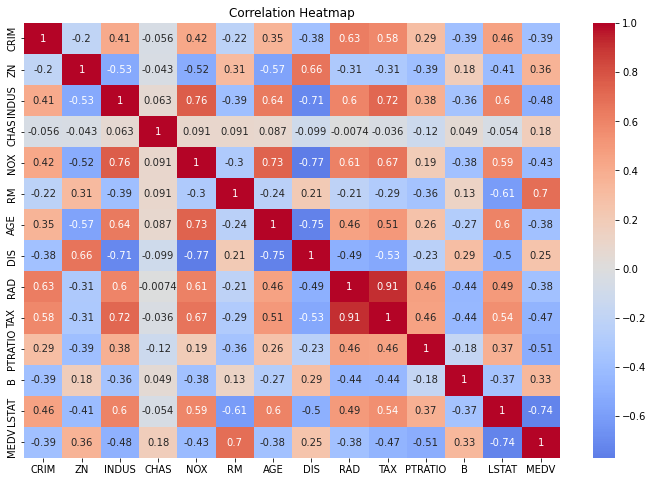

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Histograms of features 

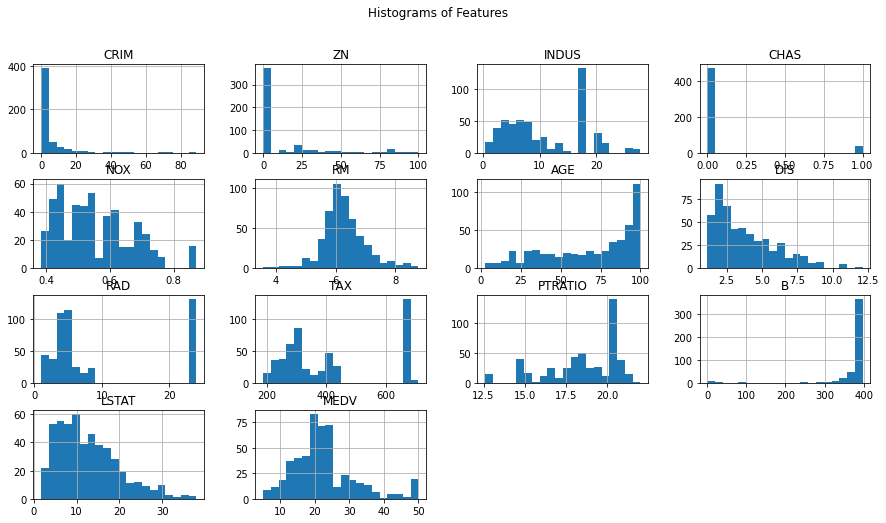

In [5]:
boston_df.hist(figsize=(15, 8), bins=20)
plt.suptitle('Histograms of Features')
plt.show()

# Regression lines for target features and rest of the feature 

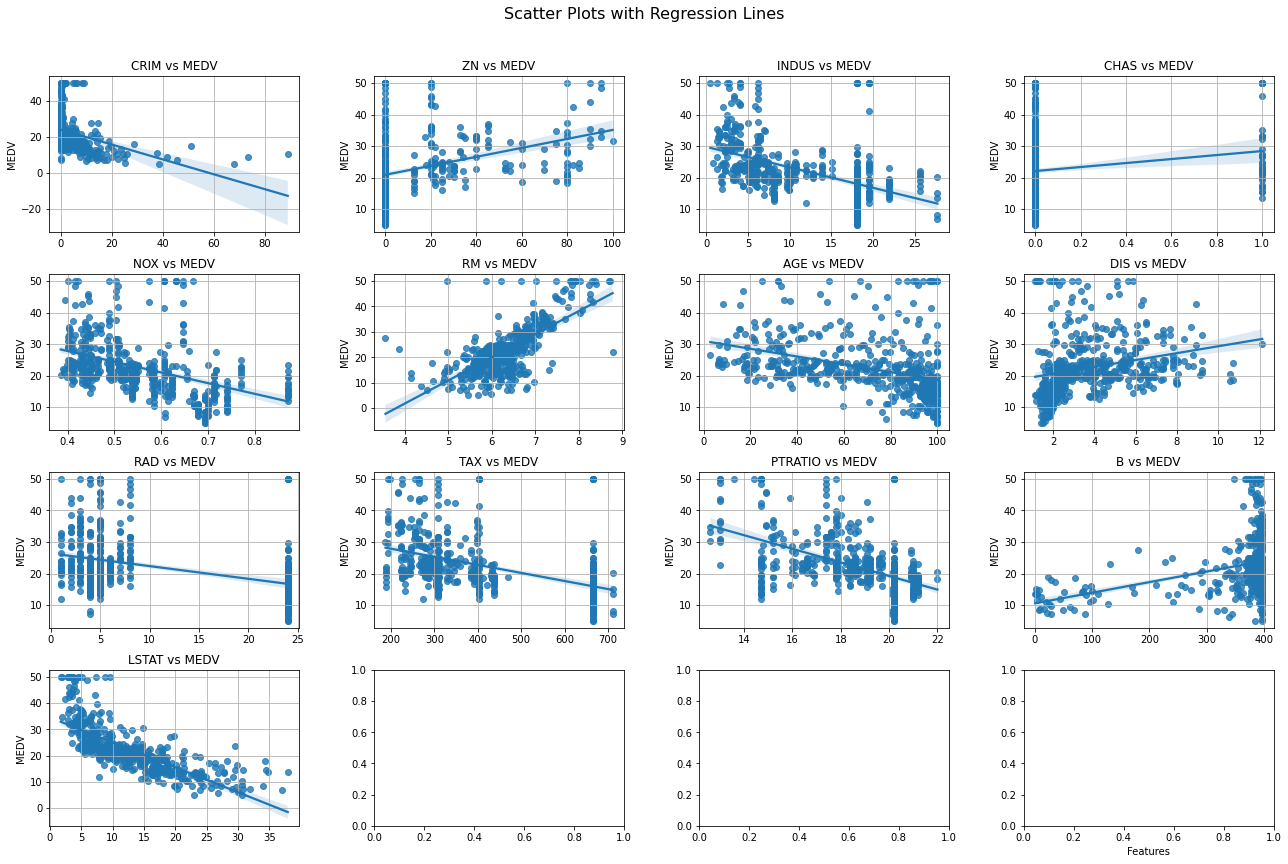

In [6]:
import matplotlib.pyplot as plt

# Set the number of rows and columns for subplots
num_rows = 4
num_cols = 4  # Change this to accommodate 2 additional features

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
fig.suptitle('Scatter Plots with Regression Lines', fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Add the missing feature names to the list
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Loop through each feature and create scatter plots with regression lines
for i, feature in enumerate(feature_names):
    if i < num_cols * num_rows:  # Avoid IndexError by checking index
        sns.regplot(x=feature, y='MEDV', data=boston_df, ax=axes[i])
        axes[i].set_title(f'{feature} vs MEDV')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('MEDV')
        axes[i].grid(True)

# Adjust layout, spacing, and distance between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9, wspace=0.3)  # Adjust wspace to control the horizontal distance
plt.xlabel('Features')  # Add common x-axis label
plt.show()

# The dataset was divided into training and validation sets, ensuring effective model evaluation. 
The dataset's samples were first counted, resulting in a total of num_samples. Utilizing an 80-20 split ratio, num_train samples were designated for training purposes, while the remaining samples were allocated for validation. The training set encompassed the first num_train samples of the dataset, and the corresponding target values were stored in y_train. For validation, the dataset was partitioned starting from the num_train-th sample, yielding the features X_val and the associated target values y_val. This division facilitated proper assessment of the model's performance on unseen data.

In [7]:
# Split the dataset into training and validation sets
num_samples = X.shape[0]
num_train = int(0.8 * num_samples)
X_train = X[:num_train]
y_train = y[:num_train]
X_val = X[num_train:]
y_val = y[num_train:] 

# Feature standardization was carried out to ensure consistent scaling of the dataset's features.
A `StandardScaler` instance named *scaler_X* was created to perform this task. The features in the training set, *X_train*, were standardized using the *fit_transform* method, resulting in *X_train_scaled*. For the validation set, *X_val*, the *transform* method of the scaler was applied to obtain *X_val_scaled*. This standardization process played a crucial role in preparing the features for the model, helping prevent discrepancies in scale that could impact model convergence and performance.

In [8]:
# Standardize the features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# Implementation of Ridge Regression from scratch for Regularized Linear Regression 
in implemented Ridge Regression, a regularization technique for linear regression. This technique helps to prevent overfitting by adding a penalty term to the cost function, leading to more generalized and stable predictions. Your code defines a class that facilitates the training of the Ridge Regression model, updating its weights and bias through iterations, and making predictions based on the learned parameters.

In [9]:
import numpy as np

class TheRidgeRegression:
      
    def __init__(self, learning_rate, iterations, l2_penalty):
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penalty = l2_penalty
      
    
          
    def fit(self, X, Y):  # Pass validation data to fit method
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        for _ in range(self.iterations):
            self.update_weights()            
        return self
      
    def update_weights(self):
        Y_pred = self.predict(self.X)
        dW = (-2 * (self.X.T).dot(self.Y - Y_pred) + (2 * self.l2_penalty * self.W)) / self.m     
        db = -2 * np.sum(self.Y - Y_pred) / self.m 
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    def predict(self, X):
        return X.dot(self.W) + self.b


# Comparative Analysis of Learning Methods for House Price Prediction Using K-Fold Cross-Validation

**Description:**

In this task, the goal is to perform a comprehensive evaluation of various learning methods for predicting house prices. The process involves using a batch setup, where the consideration of time is omitted, and the primary focus is on comparing different learning algorithms while exploring the impact of various parameters on test errors. To achieve this, a K-fold cross-validation approach is employed, ensuring the robustness and reliability of the results.

The provided code snippet outlines the methodology used to conduct the analysis. The process begins with setting up K-fold cross-validation with a specified number of folds, aimed at partitioning the dataset into subsets for training and validation. The evaluation focuses on Ridge Regression, a regularized linear regression technique. Different values of the regularization parameter (alpha) are tested, ranging from very small to relatively large values, reflecting different levels of regularization strength.

Within each fold of the cross-validation loop, the dataset is divided into training and validation sets. Features are standardized separately for each subset to ensure fair comparison and to prevent data leakage. The Ridge Regression model is then trained on the scaled training data and used to predict house prices for the validation set. The Mean Squared Error (MSE) is computed as a performance metric, quantifying the accuracy of the predictions compared to the actual values.

For each value of the regularization parameter, the average MSE across all folds is calculated and recorded. This average MSE serves as an indicator of how well the Ridge Regression model performs with different levels of regularization. The final output of the code includes a list of MSE scores corresponding to different alpha values and the average MSE across all folds. This information provides insights into the model's performance under varying conditions and allows for the identification of optimal parameter settings.

In [10]:
# Set up K-fold cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store results
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# Perform k-fold cross-validation
mse_scores = []

for alpha in alphas:
    ridge_model = TheRidgeRegression( learning_rate = 0.01, iterations = 1000, l2_penalty = alpha )
    mse_score = []
    for train_indices, val_indices in kf.split(X):
        X_train, y_train = X[train_indices], y[train_indices]
        X_val, y_val = X[val_indices], y[val_indices]

        # Standardize the features separately for training and validation sets
        scaler_X = StandardScaler()
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)

        ridge_model.fit(X_train_scaled, y_train)

        # Predict on validation set
        y_pred = ridge_model.predict(X_val_scaled)

        # Calculate Mean Squared Error
        mse = mean_squared_error(y_val, y_pred)
        mse_score.append(mse)
        
    average_mse = np.mean(mse_score)
    mse_scores.append(average_mse)

# Calculate average MSE across all folds
print("MSE scores", mse_scores)
print(f'Average MSE: {average_mse}')   

MSE scores [23.60835830615565, 23.608356161985608, 23.608339785001863, 23.608672379909798, 23.6529788623115, 25.259562551236854]
Average MSE: 25.259562551236854


# Analyzing Coefficient Magnitudes
The code snippet uses `matplotlib` to create a bar plot of coefficient magnitudes in the Ridge Regression model. This plot provides insights into the relative importance of features in predictions.

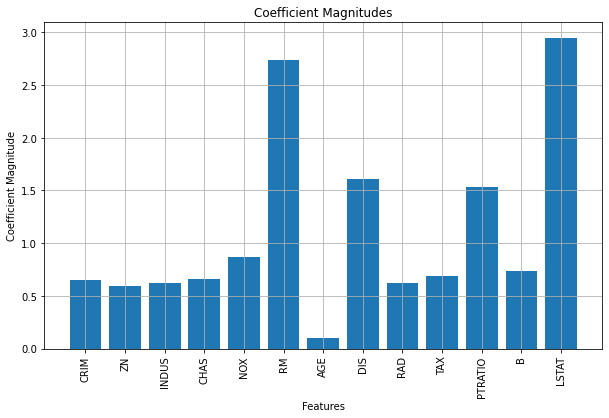

In [11]:
plt.figure(figsize=(10, 6))
coef_magnitudes = np.abs(ridge_model.W)
plt.bar(feature_names, coef_magnitudes)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('Coefficient Magnitudes')
plt.grid(True)
plt.show() 

# Heading: Optimal Alpha Selection and Validation Curve for Ridge Regression

**Description:**

This code snippet achieves two tasks. Firstly, it generates a validation curve that illustrates how different alpha values impact the average Mean Squared Error (MSE) in a logarithmic plot. This visualization helps identify the most suitable regularization strength.

Secondly, the code identifies and prints the best alpha value, which corresponds to the lowest average MSE. This value guides the selection of the optimal regularization parameter for improved accuracy in Ridge Regression-based house price predictions.

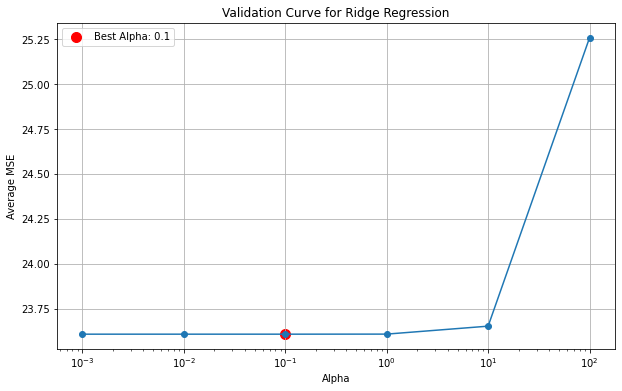

Best alpha: 0.1


In [12]:
# Find the alpha with the lowest MSE
best_alpha = alphas[np.argmin(mse_scores)]

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, mse_scores, marker='o')
plt.scatter(best_alpha, min(mse_scores), color='red', marker='o', s=100, label=f'Best Alpha: {best_alpha}')
plt.xlabel('Alpha')
plt.ylabel('Average MSE')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

# Find the alpha with the lowest MSE
print(f'Best alpha: {best_alpha}')

# Visualizing Actual vs. Predicted Values

This code snippet employs `matplotlib` to create a scatter plot comparing actual target values (`y_val`) with predicted values (`y_pred`). The diagonal dashed red line represents perfect alignment between the two. The resulting visualization facilitates a quick assessment of prediction accuracy.

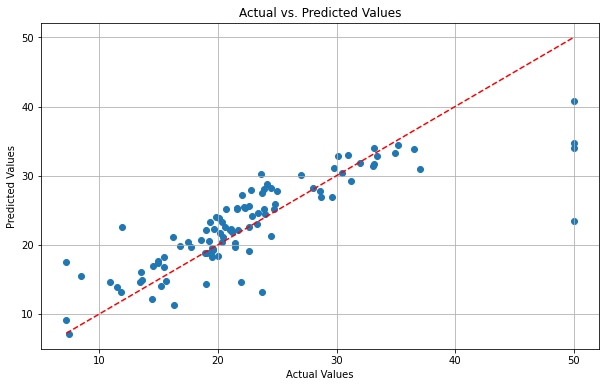

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

# Analyzing Residuals with a Plot

The code snippet employs `matplotlib` to create a scatter plot of residuals (`y_val - y_pred`) against predicted values (`y_pred`). A horizontal dashed red line at y=0 serves as a reference for unbiased predictions. This visualization helps identify patterns in prediction errors.

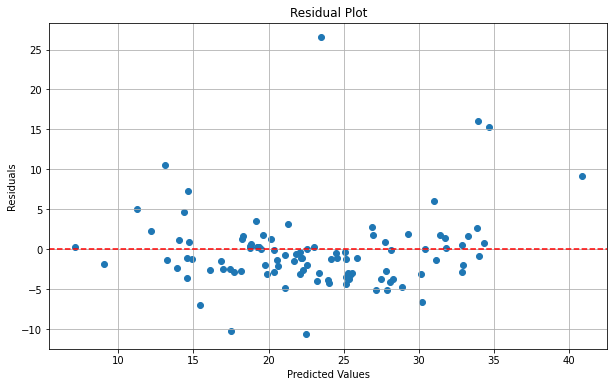

In [14]:
plt.figure(figsize=(10, 6))
residuals = y_val - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()